In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import re

In [2]:
data= pd.read_csv('QueryResults.csv')

In [3]:
df= pd.read_csv('Nettoyage_Projet5')

In [4]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,capital_Title,pr,Text
0,making particle follow path spritekit,created particle test moving xcodes property w...,<ios><iphone><ipad><sprite-kit><skemitternode>,18986098,17,6492,1,NaN,NaN,making particle follow path spritekit created ...
1,find cause malloc double free error,im programming application objectivec im getti...,<iphone><objective-c><memory-management><mallo...,971249,82,79057,13,NaN,NaN,find cause malloc double free error im program...
2,handling window closing event wpf mvvm light t...,id like handle closing event user click upper ...,<c#><wpf><xaml><mvvm><mvvm-light>,3683450,157,231366,14,wpf mvvm,1.0,handling window closing event wpf mvvm light t...
3,sessiontimeout webxml v sessionmaxinactiveinte...,im trying timeout httpsession java container w...,<java><session><servlets><weblogic><session-ti...,3118968,65,113655,2,NaN,NaN,sessiontimeout webxml v sessionmaxinactiveinte...
4,getting gdb save list breakpoints,ok info break list breakpoints format would wo...,<c++><c><debugging><gdb><breakpoints>,501486,146,51459,11,gdb,1.0,getting gdb save list breakpoints ok info brea...


In [5]:
df.drop(np.where(df['Title'].isnull())[0],inplace=True)
df.reset_index(inplace=True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Diviser les données en train set et test set
X_train = df.sample(frac=0.8, random_state=1)
X_test = df.drop(X_train.index)

# Apply CountVectorizer for train and test sets
cv = CountVectorizer()
train_cv = cv.fit_transform(X_train['Title'])
test_cv = cv.transform(X_test['Text'])

# Get feature names
#feature_names = cv.get_feature_names()

In [7]:
X_train.head()

,index,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,capital_Title,pr,Text
8190,8190,html script fragment url used x purely client ...,background say following webpage html script d...,<javascript><html><http><security><xss>,43436111,18,1009,2,html url xss,0.666667,html script fragment url used x purely client ...
21714,21715,maventomcatplugin produce corrupted executable...,problem using maven tomcat plugin produce jar ...,<java><maven><jar><tomcat7><war>,22237388,7,2841,3,jar,1.000000,maventomcatplugin produce corrupted executable...
6303,6303,enabling certificate based authentication wcf ...,wcf service exposed using single endpoint nett...,<wcf><authentication><.net-4.0><x509certificat...,7189985,9,9063,1,wcf,1.000000,enabling certificate based authentication wcf ...
36238,36239,interface valid substitute utility class java,past decade ive using pattern java utility cla...,<java><class><interface><java-8><utility-method>,30905236,28,10854,4,NaN,NaN,interface valid substitute utility class java ...
1784,1784,handle file upload via put request django,im implementing reststyle interface would like...,<python><django><rest><http-put><django-1.3>,5731984,19,9105,3,put,1.000000,handle file upload via put request django im i...


Le nombre optimal de topics est: 7


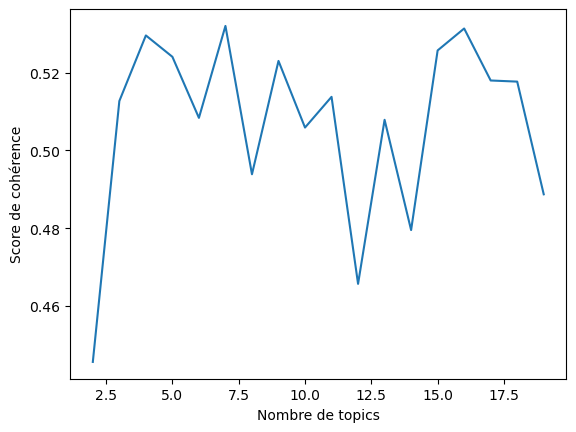

Wall time: 36min 59s


In [8]:
%%time
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import re

# Ensemble de documents
docs = []
for sentence in X_train['Text']:
    docs.append(sentence)

# Création du dictionnaire de vocabulaire
dictionary = Dictionary([doc.split() for doc in docs])

# Conversion des documents en une représentation de sac de mots
corpus = [dictionary.doc2bow(doc.split()) for doc in docs]

# Calcul du score de cohérence pour différentes valeurs de num_topics
num_topics_range = range(2, 20)
coherence_scores = []
for num_topics in num_topics_range:
    # Entraînement du modèle LDA
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,random_state=8)

    # Calcul du score de cohérence de c_v pour les sujets du modèle LDA
    coherence_model_lda = CoherenceModel(model=lda_model, texts=[doc.split() for doc in docs], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Trouver le nombre optimal de topics
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
print(f"Le nombre optimal de topics est: {optimal_num_topics}")

# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,random_state=8)

# Affichage du graphique de la score de cohérence pour différentes valeurs de num_topics
plt.plot(num_topics_range, coherence_scores)
plt.xlabel("Nombre de topics")
plt.ylabel("Score de cohérence")
plt.show()


In [9]:
# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\wiss\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [10]:
for idx, topic in lda_model.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(idx+1, ', '.join([w[0] for w in topic])))

Topic: 1 
Words: app, server, application, user, using, client, web, service, im, io
Topic: 2 
Words: file, error, using, project, line, run, version, import, build, use
Topic: 3 
Words: return, string, new, var, get, user, null, function, public, data
Topic: 4 
Words: div, image, html, button, text, view, page, width, px, height
Topic: 5 
Words: like, using, c, code, im, would, use, way, data, function
Topic: 6 
Words: nil, let, func, self, view, gem, alloc, swift, io, nsstring
Topic: 7 
Words: public, class, void, private, new, import, method, dependency, override, property


In [11]:
# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,random_state=8)

M_train_quest_topics=np.empty((len(corpus),lda_model.num_topics))
k=-1
for doc in corpus:
    k+=1
    doctopic=lda_model.get_document_topics(doc,minimum_probability=0.1)
    j=0
    B=True
    for i in range(lda_model.num_topics):
        P=0
        if B:
            if (i==doctopic[j][0]):
                P=doctopic[j][1]
                j+=1
                if j== len(doctopic) : B=False
        M_train_quest_topics[k,i]=P


In [12]:
Mtopics_words=lda_model.get_topics()

In [13]:
try:
    M_train_qest_words=M_train_quest_topics @ Mtopics_words
except MemoryError  as e:
    print(e)

Unable to allocate 122. GiB for an array with shape (39999, 409524) and data type float64


In [14]:
dictionary.token2id['use']
dictionary.id2token[241]

'internally'

In [15]:
word_ids=[]
for i in range(lda_model.num_topics):
    word_ids.append([term_id for term_id, prob in lda_model.get_topic_terms(i,topn=30)])

word_ids=list(set([item for sublist in word_ids for item in sublist]))

In [16]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
filtered_corpus = [s for s in gutenberg.sents() if all(word_id in s for word_id in word_ids)]

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\wiss\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [17]:
Mtopics_words_reduced=lda_model.get_topics()[:,word_ids]

In [18]:
M_train_qest_words_reduced=M_train_quest_topics @ Mtopics_words_reduced

In [19]:
pd.DataFrame(M_train_qest_words_reduced,columns=[dictionary[id] for id in word_ids])

,exception,function,app,application,path,python,browser,throw,client,color,...,want,image,one,self,spring,item,super,init,uiimage,viewcontroller
0,0.000286,0.003033,0.006601,0.004762,0.000189,0.000495,0.001774,0.000118,0.003274,0.000841,...,0.003870,0.002648,0.003894,0.000128,0.000024,0.001074,0.000037,0.000071,6.806910e-06,4.044629e-07
1,0.005247,0.000362,0.001792,0.003205,0.001759,0.001834,0.000127,0.002477,0.000247,0.000017,...,0.001804,0.000603,0.001449,0.000039,0.003907,0.001138,0.000220,0.000343,7.725207e-07,3.763703e-07
2,0.000203,0.001288,0.011572,0.007687,0.000164,0.000251,0.002760,0.000082,0.005737,0.000014,...,0.003168,0.000851,0.003246,0.000158,0.000032,0.000230,0.000017,0.000055,7.908515e-07,5.119561e-07
3,0.005008,0.002380,0.000908,0.002470,0.000383,0.000440,0.000016,0.002429,0.000191,0.000035,...,0.002743,0.000326,0.003045,0.000044,0.003854,0.001519,0.000243,0.000254,6.318172e-07,3.127423e-07
4,0.000920,0.005565,0.002665,0.002441,0.000269,0.000595,0.000604,0.000590,0.001821,0.000032,...,0.003504,0.000586,0.003771,0.000100,0.000084,0.000674,0.000047,0.000089,7.383172e-07,2.734352e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,0.000188,0.004033,0.000301,0.000564,0.000303,0.000382,0.001081,0.000079,0.000074,0.003950,...,0.004550,0.009715,0.002913,0.000099,0.000007,0.003300,0.000043,0.000066,2.956956e-05,3.882479e-07
39995,0.000775,0.000698,0.005966,0.005073,0.002852,0.003619,0.001205,0.000211,0.002265,0.000011,...,0.002535,0.001298,0.002186,0.000100,0.000013,0.000044,0.000006,0.000265,1.230507e-06,4.047976e-07
39996,0.000603,0.005234,0.000597,0.001669,0.000654,0.001642,0.000068,0.000230,0.000224,0.000053,...,0.004330,0.000752,0.005377,0.000075,0.000018,0.000914,0.000065,0.000141,1.022984e-06,1.754373e-07
39997,0.002623,0.001985,0.001773,0.002906,0.002178,0.002866,0.000180,0.001153,0.000286,0.000027,...,0.002795,0.000940,0.002829,0.000060,0.001576,0.000743,0.000110,0.000295,1.076671e-06,3.103208e-07


## Matrice de test set

In [20]:
# Ensemble de documents
docs_test = []
for sentence in X_test['Text']:
    docs_test.append(sentence)

# Création du dictionnaire de vocabulaire
dictionary_test = Dictionary([doc.split() for doc in docs_test])

# Conversion des documents en une représentation de sac de mots
corpus_test = [dictionary_test.doc2bow(doc.split()) for doc in docs_test]

# predict topics for the test corpus
test_topics = lda_model.get_document_topics(corpus_test)


In [21]:
M_test_quest_topics=np.empty((len(corpus_test),lda_model.num_topics))
k=-1
for doc in corpus_test:
    k+=1
    doctopic=lda_model.get_document_topics(doc,minimum_probability=0.1)
    j=0
    B=True
    for i in range(lda_model.num_topics):
        P=0
        if B:
            if (i==doctopic[j][0]):
                P=doctopic[j][1]
                j+=1
                if j== len(doctopic) : B=False
        M_test_quest_topics[k,i]=P


In [22]:
M_test_topics_words=lda_model.get_topics()

In [23]:
try:
    M_test_qest_words=M_test_quest_topics @ Mtopics_words
except MemoryError  as e:
    print(e)

Unable to allocate 30.5 GiB for an array with shape (10000, 409524) and data type float64


In [24]:
word_ids=[]
for i in range(lda_model.num_topics):
    word_ids.append([term_id for term_id, prob in lda_model.get_topic_terms(i,topn=30)])

word_ids=list(set([item for sublist in word_ids for item in sublist]))

In [25]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
filtered_corpus_test = [s for s in gutenberg.sents() if all(word_id in s for word_id in word_ids)]

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\wiss\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [26]:
M_test_topics_words_reduced=lda_model.get_topics()[:,word_ids]

In [27]:
M_test_qest_words_reduced=M_test_quest_topics @ M_test_topics_words_reduced

In [28]:
pd.DataFrame(M_test_qest_words_reduced,columns=[dictionary[id] for id in word_ids],index=X_test.index)

,exception,function,app,application,path,python,browser,throw,client,color,...,want,image,one,self,spring,item,super,init,uiimage,viewcontroller
9,0.000403,0.004105,0.004401,0.003666,0.000144,0.000769,0.001026,0.000167,0.002224,0.000041,...,0.004003,0.000704,0.004815,0.000104,0.000024,0.000729,0.000052,0.000086,8.786166e-07,2.802141e-07
14,0.000358,0.003567,0.004951,0.003908,0.000138,0.000669,0.001162,0.000148,0.002490,0.000036,...,0.003689,0.000682,0.004376,0.000105,0.000024,0.000634,0.000045,0.000077,8.203421e-07,2.903724e-07
15,0.000401,0.001947,0.008320,0.006006,0.000818,0.001224,0.001925,0.000138,0.003967,0.000021,...,0.003282,0.000929,0.003462,0.000130,0.000025,0.000327,0.000024,0.000115,9.318220e-07,4.265047e-07
18,0.003392,0.002780,0.003084,0.003196,0.001276,0.001173,0.000555,0.001774,0.001647,0.000010,...,0.002017,0.000596,0.001392,0.000078,0.002071,0.000705,0.000120,0.000224,6.688046e-07,3.853065e-07
20,0.004894,0.002243,0.000885,0.002397,0.000373,0.000414,0.000016,0.002374,0.000184,0.000033,...,0.002617,0.000310,0.002895,0.000042,0.003772,0.001472,0.000237,0.000247,6.044570e-07,3.039085e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,0.000294,0.003558,0.002813,0.002413,0.000168,0.000568,0.000925,0.000122,0.001400,0.001075,...,0.003646,0.003013,0.003702,0.000090,0.000017,0.001319,0.000043,0.000070,8.396061e-06,2.757238e-07
49987,0.001781,0.002648,0.004379,0.003793,0.000211,0.000496,0.000972,0.000849,0.002106,0.000030,...,0.003101,0.000556,0.003537,0.000087,0.001232,0.000817,0.000101,0.000125,7.094355e-07,3.137998e-07
49990,0.000510,0.002913,0.005999,0.004237,0.000193,0.000322,0.001417,0.000317,0.003224,0.000018,...,0.002717,0.000594,0.002789,0.000109,0.000054,0.000358,0.000025,0.000060,6.232471e-07,3.342730e-07
49997,0.000491,0.003939,0.002119,0.002366,0.000610,0.001361,0.000443,0.000184,0.000970,0.000040,...,0.003603,0.000699,0.004348,0.000078,0.000017,0.000685,0.000049,0.000119,8.834674e-07,2.064886e-07


## approche complémentaire « semi-supervisée »


In [29]:
from sklearn.metrics.pairwise import cosine_similarity
X_test['mots_clés']=pd.Series([])
for i in range(len(M_test_quest_topics)):
    similarities = cosine_similarity(M_test_quest_topics[i].reshape(1, -1), M_train_quest_topics)
    # find the index of the vector with the highest similarity
    idx = np.argsort(similarities)[0][-10:]
    k=X_test.index[i]
    #les tags acceptés sont les tags qui se trouve dans Text
    possible_tags=X_train["Tags"].iloc[idx].str.cat()
    #sentence=data['Title'][k] + data['Body'][k]
    #true_tags=' '.join(filter(lambda word: word in sentence, possible_tags.replace('<', '').replace('>', ' ').split()))
    X_test['mots_clés'][k]=possible_tags

C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\2819265806.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_test['mots_clés']=pd.Series([])
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\2819265806.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['mots_clés'][k]=possible_tags


## Mesures orientées métier 


### Taux de couverture des tags réels

In [30]:
X_test['Taux_tags']=pd.Series([])
for i in range(len(X_test)):
    #list_tags=X_test['Tags'][X_test.index[0]].split()
    list_tags=re.findall("\<(.*?)\>", X_test['Tags'][X_test.index[i]])
    count=0
    for j in range(len(list_tags)):
        if list_tags[j] in X_test['mots_clés'][X_test.index[i]]: count+=1
    if len(list_tags)>0 : X_test['Taux_tags'][X_test.index[i]]=count/len(list_tags)  

<>:4: DeprecationWarning: invalid escape sequence \<
<>:4: DeprecationWarning: invalid escape sequence \<
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\2356063091.py:4: DeprecationWarning: invalid escape sequence \<
  list_tags=re.findall("\<(.*?)\>", X_test['Tags'][X_test.index[i]])
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\2356063091.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_test['Taux_tags']=pd.Series([])
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\2356063091.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if len(list_tags)>0 : X_test['Taux_tags'][X_test.index[i]]=count/len(list_tags)


In [31]:
X_test['Taux_tags'].mean()

0.14564

In [32]:
X_test.loc[X_test['Taux_tags']==1]

,index,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,capital_Title,pr,Text,mots_clés,Taux_tags
5540,5540,load java class c android,trying call java code wrote c using android nd...,<java><android><c><java-native-interface><andr...,6838397,11,11459,2,c,1.0,load java class c android trying call java cod...,<dependency-injection><unity-container><reposi...,1.0
22941,22942,aspnet mvc get textbox input value,textbox input radio button example textbox inp...,<c#><html><asp.net-mvc><asp.net-mvc-4><razor>,18873098,80,538258,5,asp net mvc,1.0,aspnet mvc get textbox input value textbox inp...,<java><jquery><html><rest><spring-boot><c#><as...,1.0
27639,27640,element entityframework invalid child element ...,create new project web aspnet mvc go tool libr...,<c#><asp.net><.net><asp.net-mvc><entity-framew...,20068833,7,14625,2,NaN,NaN,element entityframework invalid child element ...,<c#><asp.net><asp.net-mvc><entity-framework><a...,1.0
27864,27865,upload pauseresume support,would like know upload file amazon pause resum...,<java><ruby-on-rails><django><amazon-s3><amazo...,11657187,8,7562,7,NaN,NaN,upload pauseresume support would like know upl...,<java><c++><c><networking><cross-platform><php...,1.0


### Taux de couverture des mots des questions

In [33]:
X_test['Taux_mots_questions']=pd.Series([])
for i in range(len(X_test)):
    idx=X_test.index[i]
    list_tags=re.findall("\<(.*?)\>", X_test['Tags'][idx])
    count=0
    for j in range(len(list_tags)):
        mot=list_tags[j]
        if mot in X_test['Text'][idx]: count+=X_test['Text'][idx].count(mot)
    X_test['Taux_mots_questions'][idx]=count/len(X_test['Text'][idx].split()) 

<>:4: DeprecationWarning: invalid escape sequence \<
<>:4: DeprecationWarning: invalid escape sequence \<
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\975849336.py:4: DeprecationWarning: invalid escape sequence \<
  list_tags=re.findall("\<(.*?)\>", X_test['Tags'][idx])
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\975849336.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_test['Taux_mots_questions']=pd.Series([])
C:\Users\wiss\AppData\Local\Temp\ipykernel_12952\975849336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Taux_mots_questions'][idx]=count/len(X_test['Text'][idx].split())


In [34]:
X_test['Taux_mots_questions'].mean()

0.12254579766067618

# Milestone 4

In [35]:
X = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', ' ', x))
y = df['Tags'].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', ' ', x))

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_X = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)


In [38]:
X_tfidf = vectorizer_X.fit_transform(X)

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

In [40]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier, Ridge, Lasso
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score



dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
rdg=Ridge()
lss=Lasso()



for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac,rdg,lss]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train2, y_train2)
    y_pred = clf.predict(X_test2)
    jaccard = jaccard_score(y_test2, y_pred, average='micro')
    print("\nClf: ", classifier.__class__.__name__)
    print("Jaccard score: ",jaccard)


Clf:  DummyClassifier
Jaccard score:  0.6786688298761795

Clf:  SGDClassifier
Jaccard score:  0.7141757413436403

Clf:  LogisticRegression
Jaccard score:  0.7143725740343639

Clf:  MultinomialNB
Jaccard score:  0.7293098372803589

Clf:  LinearSVC
Jaccard score:  0.6406888102368636

Clf:  Perceptron
Jaccard score:  0.5456698855842804

Clf:  PassiveAggressiveClassifier
Jaccard score:  0.6702844794220101

Clf:  Ridge
Jaccard score:  0.738422570377669

Clf:  Lasso
Jaccard score:  0.6786688298761795


# Milestone 5 : Proposition de mots clés – Approche supervisée Sentence embedding


## DOC2VEC

In [43]:
%%time
# Import necessary libraries
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Preprocess sentences and create TaggedDocument objects
tagged_docs = [TaggedDocument(words=sent.split(), tags=[str(i)]) for i, sent in enumerate(df['Text'])]

# Instantiate Doc2Vec with the desired model_doc2vec
model_doc2vec = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=1, workers=4)

data['MC_doc2vec'] = pd.Series([])
data['JC_doc2vec'] = pd.Series([])
for i in range(data.shape[0]):
    # Sample text
    text = data['Body'][i]

    # Split the text into a list of words
    words = text.split()

    # Extract vector representation of the text
    vector = model_doc2vec.infer_vector(words)

    # Find similar documents based on the vector representation
    similar_docs = model_doc2vec.docvecs.most_similar([vector], topn=5)

    # Extract the top 5 similar documents' tags
    tags = [data['Tags'][int(j)] for j, _ in similar_docs]
    
    # Combine the tags into a multi-word phrase
    m = ' '.join([tag for tag_list in tags for tag in tag_list])

    # Save the multi-word phrase to the data frame
    data['MC_doc2vec'][i] = m

    # Calculate the Jaccard similarity score
    intersection = set(data['MC_doc2vec'][i]).intersection(set(data['Tags'][i]))
    union = set(data['MC_doc2vec'][i]).union(set(data['Tags'][i]))
    data['JC_doc2vec'][i] = len(intersection) / len(union)


Wall time: 9min 12s


In [44]:
data['JC_doc2vec'].mean()

0.5828992229373156

## BERT en utilisant Keybert

In [45]:
%%time
# Import necessary libraries

from keybert import KeyBERT

# Instantiate KeyBERT with the desired model_bert
model_bert = KeyBERT('bert-base-uncased')

data['MC_bert']=pd.Series([])
data['JC_bert']=pd.Series([])
for i in range(5):
    # Sample text
    text = data['Body'][i]

    # Extract keywords from the text
    keyphrases = model_bert.extract_keywords(text)
    
    m=keyphrases[0][0]+ ' ' + keyphrases[1][0]+ ' ' + keyphrases[2][0]+ ' ' + keyphrases[3][0]+ ' ' + keyphrases[4][0]
    data['MC_bert'][i]=m
    # calculate the Jaccard similarity score
    intersection = set(data['MC_bert'][i]).intersection(set(data['Tags'][i]))
    union = set(data['MC_bert'][i]).union(set(data['Tags'][i]))
    data['JC_bert'][i] = len(intersection) / len(union)
    
    

No sentence-transformers model found with name C:\Users\wiss/.cache\torch\sentence_transformers\bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\wiss/.cache\torch\sentence_transformers\bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mode

Wall time: 7min 9s


In [46]:
data['JC_bert'].mean()

0.44598018648018645

## USE

In [82]:
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity

# Load the Universal Sentence Encoder model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_use = hub.load(module_url)

ValueError: Trying to load a model of incompatible/unknown type. 'C:\Users\wiss\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [84]:
import tensorflow as tf

model_path = 'C:\\Users\\wiss\\AppData\\Local\\Temp\\tfhub_modules\\063d866c06683311b44b4992fd46003be952409c'
model = tf.saved_model.load(model_path)

OSError: SavedModel file does not exist at: C:\Users\wiss\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c\{saved_model.pbtxt|saved_model.pb}

In [65]:
df_use= df.copy()

In [73]:
df['capital_Title'] = df['capital_Title'].fillna('')

In [74]:
df['Text']=df['capital_Title']+' '+df['Text']

In [78]:
# Define a function to extract tags for each row
def extract_tags(row):
    # Generate embeddings for the text
    print(row['Text'])
    embeddings = model_use([row['Text']])

    # Extract the top 5 keywords/tags based on cosine similarity
    similarity_matrix = cosine_similarity(embeddings)
    similarity_scores = list(enumerate(similarity_matrix[0]))

    top_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[:5]
    top_indices = [i[0] for i in top_scores]
    
    # Return the top 5 tags as a list
    tags = [row['Text'].split()[i:i+5] for i in top_indices]
    return tags

In [81]:
%%time
# Apply the function to each row in the DataFrame to extract tags
df['Motscl'] = df.apply(extract_tags, axis=1)

 making particle follow path spritekit created particle test moving xcodes property window look like added particle scene made circle forced particle run circle using nsstring myparticlepath nsbundle mainbundle pathforresourceparticle oftypesks skemitternode myparticle nskeyedunarchiver unarchiveobjectwithfilemyparticlepath self addchildmyparticle cgpathref circle cgpathcreatewithellipseinrectcgrectmake null skaction followtrack skaction followpathcircle asoffsetno orienttopathyes duration skaction forever skaction repeatactionforeverfollowtrack myparticle runactionforever look like like block white sugar candy node particle following path generated particle represented circle dashed see path following idea thanks 


TypeError: 'AutoTrackable' object is not callable

In [80]:
print(type(model_use), model_use)

<class 'tensorflow.python.trackable.autotrackable.AutoTrackable'> <tensorflow.python.trackable.autotrackable.AutoTrackable object at 0x000002A7A315FFD0>


In [ ]:
df_use['JC']=pd.Series([])
df_use['Tags']=df['Tags'].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', ' ', x).lower().split())
for i in range(df_use.shape[0]):    
    # calculate the Jaccard similarity score
    intersection = set(df_use['Tags'][i]).intersection(set(df_use['Motscl'][i][0]))
    union = set(df_use['Tags'][i]).union(set(df_use['Motscl'][i][0]))
    df_use['JC'][i] = len(intersection) / len(union)

In [ ]:
df_use['JC'].mean()

In [49]:
%%time

import tensorflow_hub as hub
import tensorflow_text

# Load the Universal Sentence Encoder
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Calculate the sentence embeddings for all documents
embeddings = use(data['Body'])

data['MC_use'] = pd.Series([])
data['JC_use'] = pd.Series([])
for i in range(5):
    # Extract the embedding of the current document
    current_embedding = embeddings[i]
    
    # Find similar embeddings based on cosine similarity
    similarities = np.dot(embeddings, current_embedding.T)
    similar_docs = np.argsort(similarities)[::-1][:6]
    
    # Extract the tags of the top 5 similar documents
    tags = [data['Tags'][j] for j in similar_docs[1:]]
    
    # Combine the tags into a multi-word phrase
    m = ' '.join([tag for tag_list in tags for tag in tag_list])
    
    # Save the multi-word phrase to the data frame
    data['MC_use'][i] = m
    
    # Calculate the Jaccard similarity score
    intersection = set(data['MC_use'][i]).intersection(set(data['Tags'][i]))
    union = set(data['MC_use'][i]).union(set(data['Tags'][i]))
    data['JC_use'][i] = len(intersection) / len(union)

ValueError: Trying to load a model of incompatible/unknown type. 'C:\Users\wiss\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [ ]:
df_use['JC_use'].mean()

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
from sentence_transformers import SentenceTransformer
from keybert import KeyBERT

# Load the Universal Sentence Encoder module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

# Load the SentenceTransformer model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Initialize the KeyBERT model
keybert_model = KeyBERT(model=model)
